In [1]:
from music21 import converter, instrument, note, chord, midi, stream
import glob
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Input, LSTM, Dropout, Activation
from keras.callbacks import EarlyStopping, ModelCheckpoint

Using TensorFlow backend.


In [2]:
import music21
notes = []
track = 0

for i, file in enumerate(glob.glob("NCS/*.mid")):
    midi = converter.parse(file)
    # There are multiple tracks in the MIDI file, so we'll use the first one
    midi = midi[track]
    notes_to_parse = None
        
    # Parse the midi file by the notes it contains
    notes_to_parse = midi.flat.notes
        
    for element in notes_to_parse:
        if isinstance(element, music21.note.Note):
            notes.append(str(element.pitch))
        elif isinstance(element, chord.Chord):
            # get's the normal order (numerical representation) of the chord
            notes.append('.'.join(str(n) for n in element.normalOrder))
    print("Song {} Loaded".format(i+1))
                
print("DONE LOADING SONGS")    
# Get all pitch names
pitches = sorted(set(item for item in notes))
# Get all pitch names
vocab_length = len(pitches)  
number_notes = len(notes)
print(pitches)
#print(notes)

Song 1 Loaded
Song 2 Loaded
Song 3 Loaded
Song 4 Loaded
Song 5 Loaded
Song 6 Loaded
Song 7 Loaded
DONE LOADING SONGS
['0', '0.2.7', '0.4', '0.4.7', '0.5', '1', '1.2.6', '1.4', '1.6', '10', '11', '11.0.4.7', '11.2.4', '11.4', '2', '2.4.7', '2.4.9', '2.5.7', '2.6.9', '2.7', '3', '4', '4.7.11', '4.7.9', '4.8.11', '4.9', '5', '5.7.0', '5.9.0', '6', '6.9', '6.9.1', '7', '7.0', '7.10.2', '7.11.0', '7.11.2', '7.9.0', '7.9.2', '8', '8.11', '9', '9.0', '9.0.2', '9.0.4', '9.1', '9.1.4', '9.11.2', '9.11.4', '9.2', 'A3', 'A4', 'A5', 'B-4', 'B-5', 'B3', 'B4', 'B5', 'C#4', 'C#5', 'C3', 'C4', 'C5', 'C6', 'D3', 'D4', 'D5', 'D6', 'E-4', 'E-5', 'E-6', 'E3', 'E4', 'E5', 'F#3', 'F#4', 'F#5', 'F3', 'F4', 'F5', 'G#3', 'G#4', 'G#5', 'G3', 'G4', 'G5']


In [3]:
 #assign an index to each of the possible notes
note_dict = dict()
for i, note in enumerate(pitches):
    note_dict[note] = i
#print(note_dict)

# construct sequences. Taking each note and encoding it as a numpy array with a 1 in the position of the note it has
sequence_length = 60
# make a numpy array with the number of training examples, sequence length, and the length of the one-hot-encoding
num_training = number_notes - sequence_length
print(number_notes)
print(num_training)

input_notes = np.zeros((num_training, sequence_length, vocab_length))
output_notes = np.zeros((num_training, vocab_length))

for i in range(0, num_training):
    # i is the training example, j is the note in the sequence for a specific training example
    input_sequence = notes[i: i+sequence_length]
    output_note = notes[i+sequence_length]
    for j, note in enumerate(input_sequence):
        input_notes[i][j][note_dict[note]] = 1
    output_notes[i][note_dict[output_note]] = 1
print(input_notes.shape)
print(output_notes.shape)

4619
4559
(4559, 60, 86)
(4559, 86)


In [4]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(sequence_length, vocab_length)))
model.add(Dropout(0.2))
model.add(LSTM(128, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(vocab_length))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])

history = model.fit(input_notes, output_notes, batch_size=128, nb_epoch=200)

C:\Users\Roshan\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/200
4559/4559 [==============================] - 18s 4ms/step - loss: 3.5980 - acc: 0.1413
Epoch 2/200
4559/4559 [==============================] - 18s 4ms/step - loss: 2.8940 - acc: 0.1924
Epoch 3/200
4559/4559 [==============================] - 18s 4ms/step - loss: 2.6911 - acc: 0.2029
Epoch 4/200
4559/4559 [==============================] - 19s 4ms/step - loss: 2.5442 - acc: 0.2172
Epoch 5/200
4559/4559 [==============================] - 19s 4ms/step - loss: 2.4606 - acc: 0.2242
Epoch 6/200
4559/4559 [==============================] - 18s 4ms/step - loss: 2.3858 - acc: 0.2435
Epoch 7/200
4559/4559 [==============================] - 18s 4ms/step - loss: 2.3232 - acc: 0.2601
Epoch 8/200
4559/4559 [==============================] - 18s 4ms/step - loss: 2.2624 - acc: 0.2687
Epoch 9/200
4559/4559 [==============================] - 18s 4ms/step - loss: 2.2073 - acc: 0.2764
Epoch 10/200
4559/4559 [==============================] - 18s 4ms/step - loss: 2.1661 - acc: 0.2928
Epoch 11/

4559/4559 [==============================] - 19s 4ms/step - loss: 0.5543 - acc: 0.7973
Epoch 84/200
4559/4559 [==============================] - 18s 4ms/step - loss: 0.5479 - acc: 0.8008
Epoch 85/200
4559/4559 [==============================] - 19s 4ms/step - loss: 0.5229 - acc: 0.8103
Epoch 86/200
4559/4559 [==============================] - 19s 4ms/step - loss: 0.5303 - acc: 0.8026
Epoch 87/200
4559/4559 [==============================] - 19s 4ms/step - loss: 0.5215 - acc: 0.8122
Epoch 88/200
4559/4559 [==============================] - 19s 4ms/step - loss: 0.5056 - acc: 0.8162
Epoch 89/200
4559/4559 [==============================] - 17s 4ms/step - loss: 0.5088 - acc: 0.8164
Epoch 90/200
4559/4559 [==============================] - 19s 4ms/step - loss: 0.4943 - acc: 0.8212
Epoch 91/200
4559/4559 [==============================] - 20s 4ms/step - loss: 0.4788 - acc: 0.8320
Epoch 92/200
4559/4559 [==============================] - 18s 4ms/step - loss: 0.4760 - acc: 0.8287
Epoch 93/200


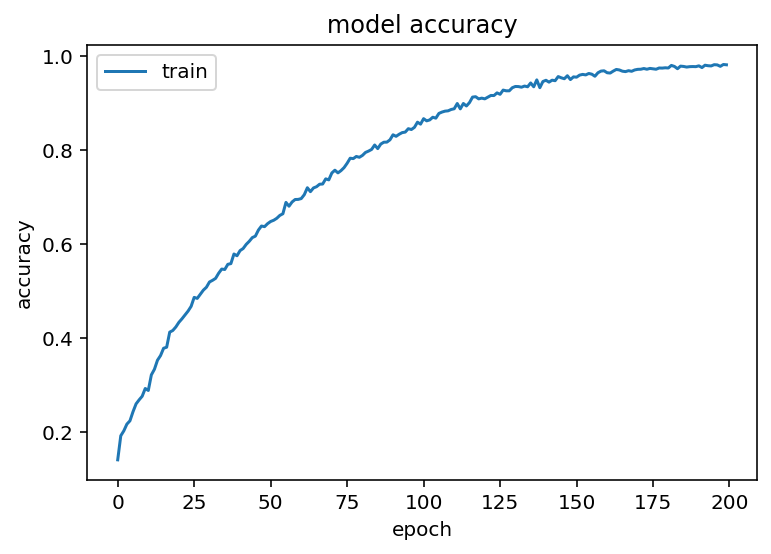

In [5]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [6]:
# Make a dictionary going backwards (with index as key and the note as the value)
backward_dict = dict()
for note in note_dict.keys():
    index = note_dict[note]
    backward_dict[index] = note

# pick a random sequence from the input as a starting point for the prediction
n = np.random.randint(0, len(input_notes)-1)
sequence = input_notes[n]
start_sequence = sequence.reshape(1, sequence_length, vocab_length)
output = []

# generate a song of 100 notes
for i in range(0, 150):
    newNote = model.predict(start_sequence, verbose=0)
    # Get the position with the highest probability
    index = np.argmax(newNote)
    encoded_note = np.zeros((vocab_length))
    encoded_note[index] = 1
    output.append(encoded_note)
    sequence = start_sequence[0][1:]
    start_sequence = np.concatenate((sequence, encoded_note.reshape(1, vocab_length)))
    start_sequence = start_sequence.reshape(1, sequence_length, vocab_length)
    

# Now output is populated with notes in their string form

In [7]:
import music21
finalNotes = [] 
for element in output:
    index = list(element).index(1)
    finalNotes.append(backward_dict[index])
    
offset = 0
output_notes = []
    
# create note and chord objects based on the values generated by the model
for pattern in finalNotes:
    # pattern is a chord
    if ('.' in pattern) or pattern.isdigit():
        notes_in_chord = pattern.split('.')
        notes = []
        for current_note in notes_in_chord:
            new_note = music21.note.Note(int(current_note))
            new_note.storedInstrument = instrument.Piano()
            notes.append(new_note)
        new_chord = chord.Chord(notes)
        new_chord.offset = offset
        output_notes.append(new_chord)
    # pattern is a note
    else:
        new_note = music21.note.Note(pattern)
        new_note.offset = offset
        new_note.storedInstrument = instrument.Piano()
        output_notes.append(new_note)

    # increase offset each iteration so that notes do not stack
    offset += 0.5

midi_stream = stream.Stream(output_notes)

midi_stream.write('midi', fp='ncs_output.mid')

'ncs_output.mid'

In [20]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 50, 128)           85504     
_________________________________________________________________
dropout_5 (Dropout)          (None, 50, 128)           0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 38)                4902      
_________________________________________________________________
activation_3 (Activation)    (None, 38)                0         
Total params: 221,990
Trainable params: 221,990
Non-trainable params: 0
________________________________________________